In [22]:
from scipy.io import loadmat
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [24]:
# Load .mat file
file_path = r"C:\Users\user\Desktop\Brain Hackathon\stroke_rehab_data_analysis\data\P1_post_training.mat"
data = loadmat(file_path)

# Extract data
fs = int(data['fs'][0][0])      # sampling frequency
trig = data['trig'].flatten()   # flatten from (N,1) → (N,)
y = data['y']                   # signal data (N,16)

# Create a time axis (in seconds)
time = np.arange(y.shape[0]) / fs

# Build dataframe: time, triggers, and all channels
columns = ['time_sec', 'trig'] + [f'ch{i+1}' for i in range(y.shape[1])]
df = pd.DataFrame(
    data = np.column_stack((time, trig, y)),
    columns = columns
)

# Save to CSV and Excel
df.to_csv("stroke_data.csv", index=False)
# df.to_excel("stroke_data.xlsx", index=False)

print("✅ Data exported successfully")
print("Sampling frequency:", fs, "Hz")
print("Data shape:", df.shape)

✅ Data exported successfully
Sampling frequency: 256 Hz
Data shape: (197343, 18)


In [20]:
df.head()

,time_sec,trig,ch1,ch2,ch3,ch4,ch5,ch6,ch7,ch8,ch9,ch10,ch11,ch12,ch13,ch14,ch15,ch16
0,0.000000,0.0,-25043.550781,-5737.303223,-18152.865234,-23633.101562,-23464.302734,-11776.573242,-9784.015625,14616.613281,-26254.349609,-19553.699219,-27716.511719,-11567.393555,-10440.858398,-17305.886719,-32786.644531,-20801.628906
1,0.003906,0.0,-25006.724609,-5696.766113,-18123.582031,-23621.216797,-23447.193359,-11748.185547,-9764.528320,14625.510742,-26237.824219,-19523.324219,-27696.916016,-11549.557617,-10426.366211,-17285.257812,-32776.605469,-20792.246094
2,0.007812,0.0,-25012.861328,-5705.850098,-18127.794922,-23624.955078,-23457.673828,-11753.310547,-9772.868164,14614.489258,-26249.132812,-19540.306641,-27710.902344,-11564.959961,-10436.654297,-17287.755859,-32787.898438,-20800.513672
3,0.011719,0.0,-25049.177734,-5747.156250,-18151.675781,-23643.142578,-23477.521484,-11779.245117,-9793.252930,14607.075195,-26261.652344,-19557.111328,-27731.816406,-11587.164062,-10452.777344,-17303.576172,-32798.621094,-20812.357422
4,0.015625,0.0,-25073.107422,-5773.918945,-18157.382812,-23635.779297,-23471.990234,-11790.697266,-9796.210938,14617.480469,-26248.853516,-19542.599609,-27715.939453,-11581.019531,-10449.916992,-17307.720703,-32786.296875,-20804.257812


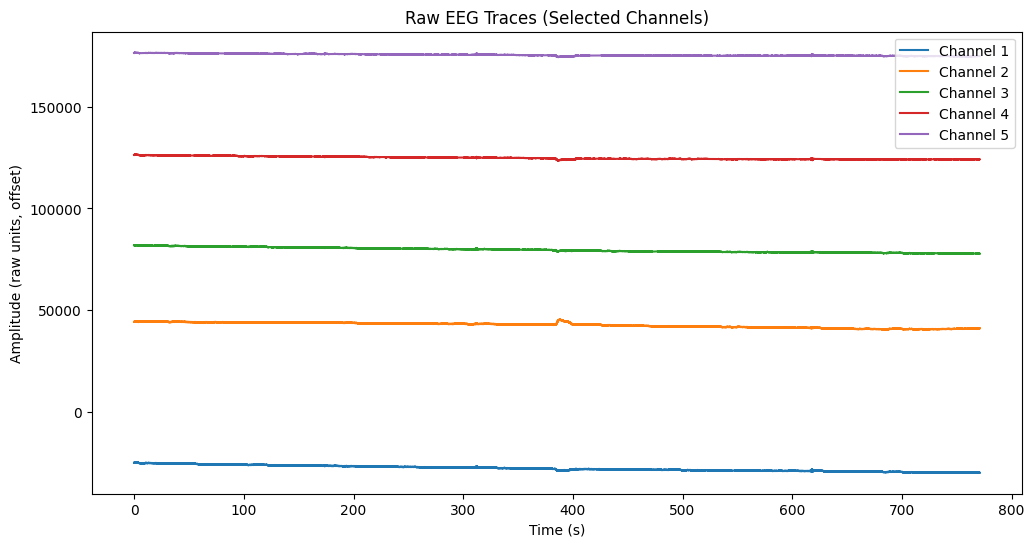

In [26]:

# First column = time, next columns = EEG channels
time = df.iloc[:, 0].values
eeg = df.iloc[:, 2:].values   # skipping col 1 if it's a trigger channel

# Choose some channels to plot (e.g., first 5 EEG channels)
channels_to_plot = [0, 1, 2, 3, 4]

offset = 50000 #vertical spacing between channels

plt.figure(figsize=(12, 6))

for i, ch in enumerate(channels_to_plot):
    plt.plot(time, eeg[:, ch] + i*offset, label=f'Channel {ch+1}')
    # offset each channel vertically (50000 = shift, adjust based on your data scale)

plt.xlabel("Time (s)")
plt.ylabel("Amplitude (raw units, offset)")
plt.title("Raw EEG Traces (Selected Channels)")
plt.legend()
plt.show()


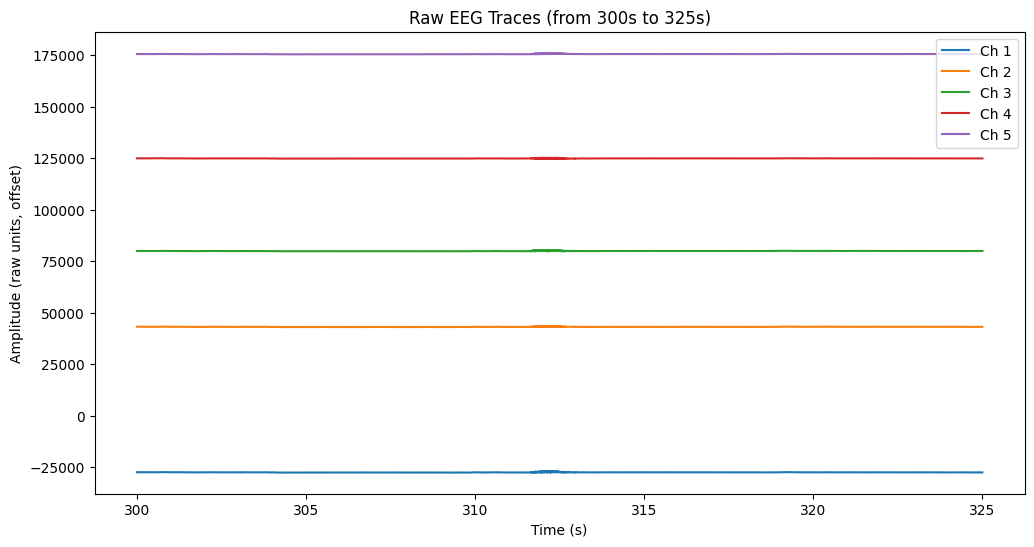

In [33]:
# Define your window
start_time = 300   # seconds
end_time   = 325   # seconds

# Create a mask for that range
mask = (time >= start_time) & (time <= end_time)

# Plot EEG for selected channels
plt.figure(figsize=(12,6))
offset = 50000  # vertical shift between channels
for i, ch in enumerate(channels_to_plot):
    plt.plot(time[mask], eeg[mask, ch] + i*offset, label=f'Ch {ch+1}')

plt.xlabel("Time (s)")
plt.ylabel("Amplitude (raw units, offset)")
plt.title(f"Raw EEG Traces (from {start_time}s to {end_time}s)")
plt.legend()
plt.show()
